In [182]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

In [184]:
file1 = pd.read_csv(r"D:\Data Science\file2.csv")
file2 = pd.read_csv(r"D:\Data Science\file2.csv")
merged_df = pd.merge(file1, file2, on='names', how='inner')

# Merge the two dataframes, giving priority to the first file's data where conflicts exist
merged_data = pd.concat([file1, file2]).groupby('names', as_index=False).first()


In [186]:
#  General Properties

# dimensions of DF
print("Dimensions of DF: ", merged_data.shape)

# print Information of DF
print("\nInformation about DF: ")
print(merged_data.info())

# First fifth rows of DF
print("\nHead of DF: \n", merged_data.head(5))

Dimensions of DF:  (999, 10)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   names        999 non-null    object 
 1   year         999 non-null    object 
 2   Certificate  898 non-null    object 
 3   Runtime      999 non-null    int64  
 4   Genre        999 non-null    object 
 5   Rating       999 non-null    float64
 6   Overview     999 non-null    object 
 7   Director     999 non-null    object 
 8   Budget       999 non-null    int64  
 9   Revenue      999 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB
None

Head of DF: 
                    names  year Certificate  Runtime  \
0   (500) Days of Summer  2009          UA       95   
1           12 Angry Men  1957           U       96   
2       12 Years a Slave  2013           A      134   
3                   1917  2019     

In [188]:
#  1- Remove unused Columns which are Certificate , Overview and Director
merged_data.drop("Certificate", axis=1, inplace=True)
merged_data.drop("Overview", axis=1, inplace=True)
merged_data.drop("Director", axis=1, inplace=True)
print(merged_data.columns.tolist())

['names', 'year', 'Runtime', 'Genre', 'Rating', 'Budget', 'Revenue']


In [190]:
# 2- Remove duplication in the rows (check and process if exist)

# Number of rows (in advance)
print("Current Number of rows", merged_data.shape[0])
# check Rows Duplication
duplicated_rows = sum(merged_data.duplicated())
print("Number of Duplicated rows: ", duplicated_rows)
if(duplicated_rows):
  merged_data.drop_duplicates(keep ='first', inplace=True)
print("New Number of rows after Removing duplication", merged_data.shape[0])

Current Number of rows 999
Number of Duplicated rows:  0
New Number of rows after Removing duplication 999


In [192]:
# 3- Remove rows contains noisy data (Some movies has 'zero' budget or revenue. So, we need to discard it
# drop rows where value of a 'budget' column is zero
merged_data.drop(merged_data.index[merged_data['Budget'] == 0], inplace = True)
# drop rows where value of a 'revenue' column is zero
merged_data.drop(merged_data.index[merged_data['Revenue'] == 0], inplace = True)
# Number of Rows after removing rows contains zero value in 'budget' and 'revenue' columns
print("Number of rows after removing noisy data: ", merged_data.shape[0])


Number of rows after removing noisy data:  999


In [194]:
# 4- Check NN values and modify it with a value (zero or mean or median or stay as it is according to the data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   names    999 non-null    object 
 1   year     999 non-null    object 
 2   Runtime  999 non-null    int64  
 3   Genre    999 non-null    object 
 4   Rating   999 non-null    float64
 5   Budget   999 non-null    int64  
 6   Revenue  999 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [196]:
 # Using info function on DF, there is not cloumns contains NN values 

In [198]:
# 5- Modify the datatype of 'relase_date' column to the correct datatype (from string into date)

# Create a copy of the DataFrame before modifying it to avoid the warning
merged_df = merged_df.copy()

# Convert 'year_x' to string to handle non-string values
merged_df['year_x'] = merged_df['year_x'].astype(str)

# Filter rows where 'year_x' contains only digits
merged_df = merged_df[merged_df['year_x'].str.isdigit()]

# Convert 'year_x' to datetime
merged_df['year_x'] = pd.to_datetime(merged_df['year_x'], format='%Y')

# Verify the result
print(merged_df.info())





<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   names          1001 non-null   object        
 1   year_x         1001 non-null   datetime64[ns]
 2   Certificate_x  900 non-null    object        
 3   Runtime_x      1001 non-null   int64         
 4   Genre_x        1001 non-null   object        
 5   Rating_x       1001 non-null   float64       
 6   Overview_x     1001 non-null   object        
 7   Director_x     1001 non-null   object        
 8   Budget_x       1001 non-null   int64         
 9   Revenue_x      1001 non-null   int64         
 10  year_y         1001 non-null   object        
 11  Certificate_y  900 non-null    object        
 12  Runtime_y      1001 non-null   int64         
 13  Genre_y        1001 non-null   object        
 14  Rating_y       1001 non-null   float64       
 15  Overview_y     1001 non-nu

In [200]:
# remove unwanted duplicates

# Perform the merge again with specific suffixes, keeping only one set of columns
merged_df = pd.merge(file1, file2, on='names', how='inner', suffixes=('', '_drop'))

# Drop columns that have the '_drop' suffix, which are the unwanted duplicates
merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith('_drop')]

# Verify the result
print(merged_df.head())
print(merged_df.info())


                      names  year Certificate  Runtime                 Genre  \
0  The Shawshank Redemption  1994           A      142                 Drama   
1             The Godfather  1972           A      175          Crime, Drama   
2           The Dark Knight  2008          UA      152  Action, Crime, Drama   
3    The Godfather: Part II  1974           A      202          Crime, Drama   
4              12 Angry Men  1957           U       96          Crime, Drama   

   Rating                                           Overview  \
0     9.3  Two imprisoned men bond over a number of years...   
1     9.2  An organized crime dynasty's aging patriarch t...   
2     9.0  When the menace known as the Joker wreaks havo...   
3     9.0  The early life and career of Vito Corleone in ...   
4     9.0  A jury holdout attempts to prevent a miscarria...   

               Director    Budget   Revenue  
0        Frank Darabont  27247177  39508284  
1  Francis Ford Coppola  87709086  8201388

In [202]:
#  Exploratory Data Analysis

In [204]:
# compute profit as revenue minus budget
merged_df["Profit"] = merged_df['Revenue'] - merged_df['Budget']
merged_df.head(5)

,names,year,Certificate,Runtime,Genre,Rating,Overview,Director,Budget,Revenue,Profit
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,27247177,39508284,12261107
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,87709086,82013889,-5695197
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,72433597,78665520,6231923
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,79439758,34078481,-45361277
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,16906366,13097124,-3809242


In [206]:
# Descriptive statistics about DF
merged_df.describe()

,Runtime,Rating,Budget,Revenue,Profit
count,1002.000000,1002.000000,1.002000e+03,1.002000e+03,1.002000e+03
mean,122.968064,7.949900,5.445459e+07,5.399526e+07,-4.593358e+05
std,28.118576,0.275552,2.564941e+07,2.649228e+07,3.619745e+07
min,45.000000,7.600000,1.005330e+07,1.002872e+07,-8.698222e+07
25%,103.000000,7.700000,3.259409e+07,3.022391e+07,-2.457970e+07
50%,119.000000,7.900000,5.379709e+07,5.287077e+07,-1.156968e+06
75%,137.000000,8.100000,7.583059e+07,7.656302e+07,2.411256e+07
max,321.000000,9.300000,9.999197e+07,9.993049e+07,8.817958e+07


In [208]:
'''
From the above result, we get some important insights:
 1- minimum runtime = 45, average = 122.9, and maximum = 321
 2- minimum rating = 7.6, average = 7.94, and maximum = 9.3
 3- for profit, Maximum profit exceeds 88 million  dollar and average is about -459,335.8  
dollar , there exist a movies that losses money

- Conduct distribution about runtime of the movies for more details
'''

'\nFrom the above result, we get some important insights:\n 1- minimum runtime = 45, average = 122.9, and maximum = 321\n 2- minimum rating = 7.6, average = 7.94, and maximum = 9.3\n 3- for profit, Maximum profit exceeds 88 million  dollar and average is about -459,335.8  \ndollar , there exist a movies that losses money\n\n- Conduct distribution about runtime of the movies for more details\n'

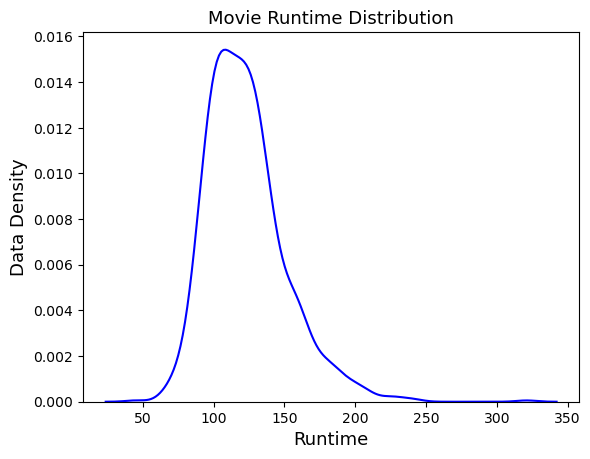

In [212]:
#  Research Question 1: Information about the runtime of the movies

 # Use Kdeplot for displying the distribution of runtime column 
sn.kdeplot(merged_df.Runtime, color='blue')
#x-axis 
plt.xlabel('Runtime',  fontsize = 13)
#y-axis 
plt.ylabel('Data Density', fontsize=13)
plt.title('Movie Runtime Distribution',fontsize=13)
# show plot
plt.show()

In [214]:
'''
From the above KDEplot : The minimum runtime value is 45, Average runtime is about '122.9', 
Maximum runtime is '321'. The plot is righ skew. Most movies exceeds the average runtime.
'''

"\nFrom the above KDEplot : The minimum runtime value is 45, Average runtime is about '122.9', \nMaximum runtime is '321'. The plot is righ skew. Most movies exceeds the average runtime.\n"

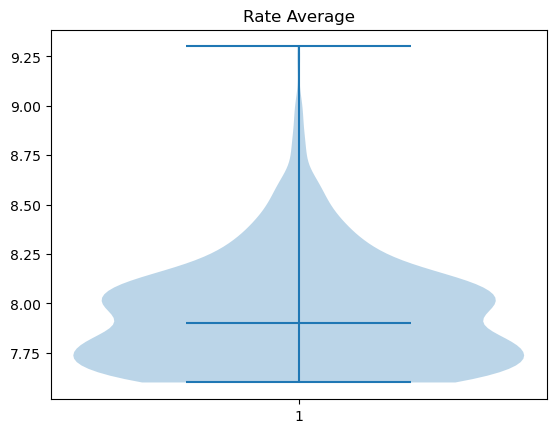

In [216]:
# Research Question 2: Information about Rate Average of the movies
fig,ax1 =plt.subplots(nrows=1 , ncols=1);
ax1.violinplot(merged_df.Rating, showmedians=True)
ax1.set_title('Rate Average')
ax1.set_xticks([1])
plt.show()



In [220]:
'''
From the above graph, we get some important insights from the distribution of
distribution of Rate Average is right skew .it seems to have no outlier.
'''

'\nFrom the above graph, we get some important insights from the distribution of\ndistribution of Rate Average is right skew .it seems to have no outlier.\n'

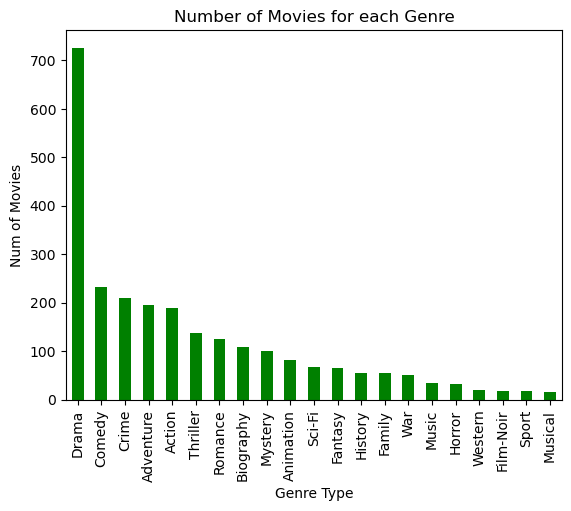

In [256]:
# Research Question 3: Count each genres of movies in the dataset

#reset the index to ensure no duplicate labels
merged_df_reset = merged_df.reset_index(drop=True)

# Split the 'Genre' column by commas, strip whitespace, and explode into individual rows
merged_df_reset['genres'] = merged_df_reset['Genre'].str.split(',').apply(lambda x: [g.strip() for g in x])

# Explode the 'genres' column to create separate rows for each genre
new_df = merged_df_reset.explode('genres')

#Count the occurrences of each genre and plot the results
new_df['genres'].value_counts().plot(
    kind='bar', color='green', 
    title="Number of Movies for each Genre", 
    xlabel='Genre Type', ylabel='Num of Movies'
)

# Show the plot
plt.show()






In [252]:
'''
From the above graph: Drama and Comedy has the highest genere type
'''

'\nFrom the above graph: Drama and Comedy has the highest genere type\n'

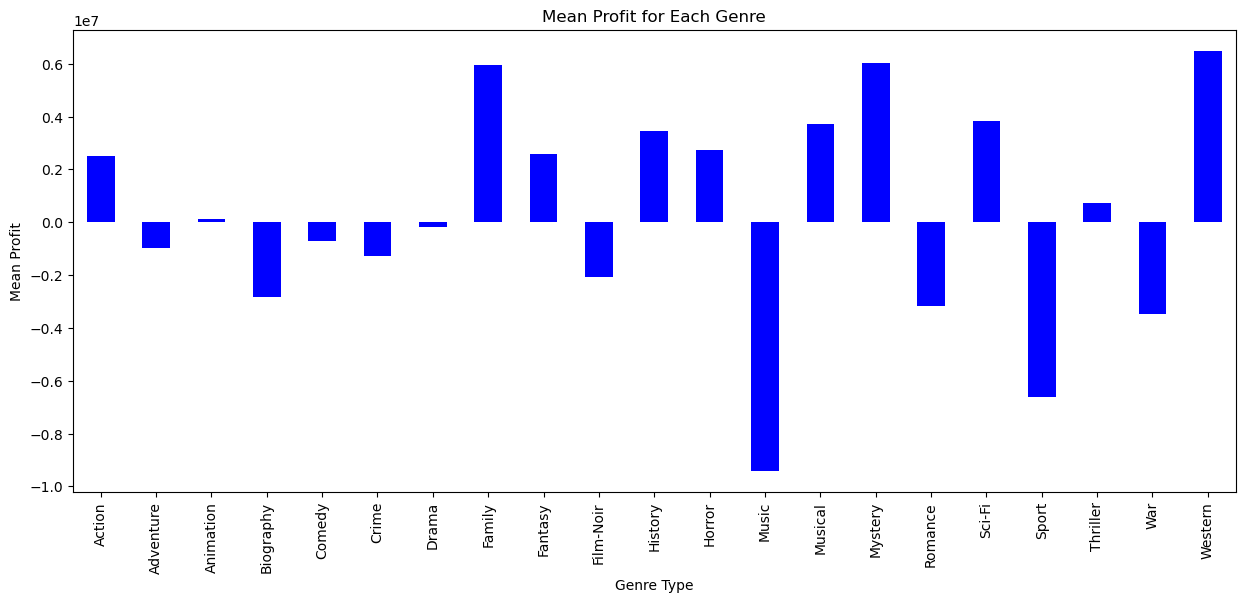

In [266]:
# Research Question 4: Mean profit for each genres
# Group by genres and calculate mean profit
mean_profit = new_df.groupby('genres')['Profit'].mean()

# Plot the results
mean_profit.plot(
    kind='bar', color='blue',
    title='Mean Profit for Each Genre', xlabel='Genre Type', ylabel='Mean Profit',
    figsize=(15, 6)
)

# Show the plot
plt.show()

In [268]:
'''
From the above, movies of type action, Western and Mystery achieve the better profit.
'''

'\nFrom the above, movies of type action, Western and Mystery achieve the better profit.\n'

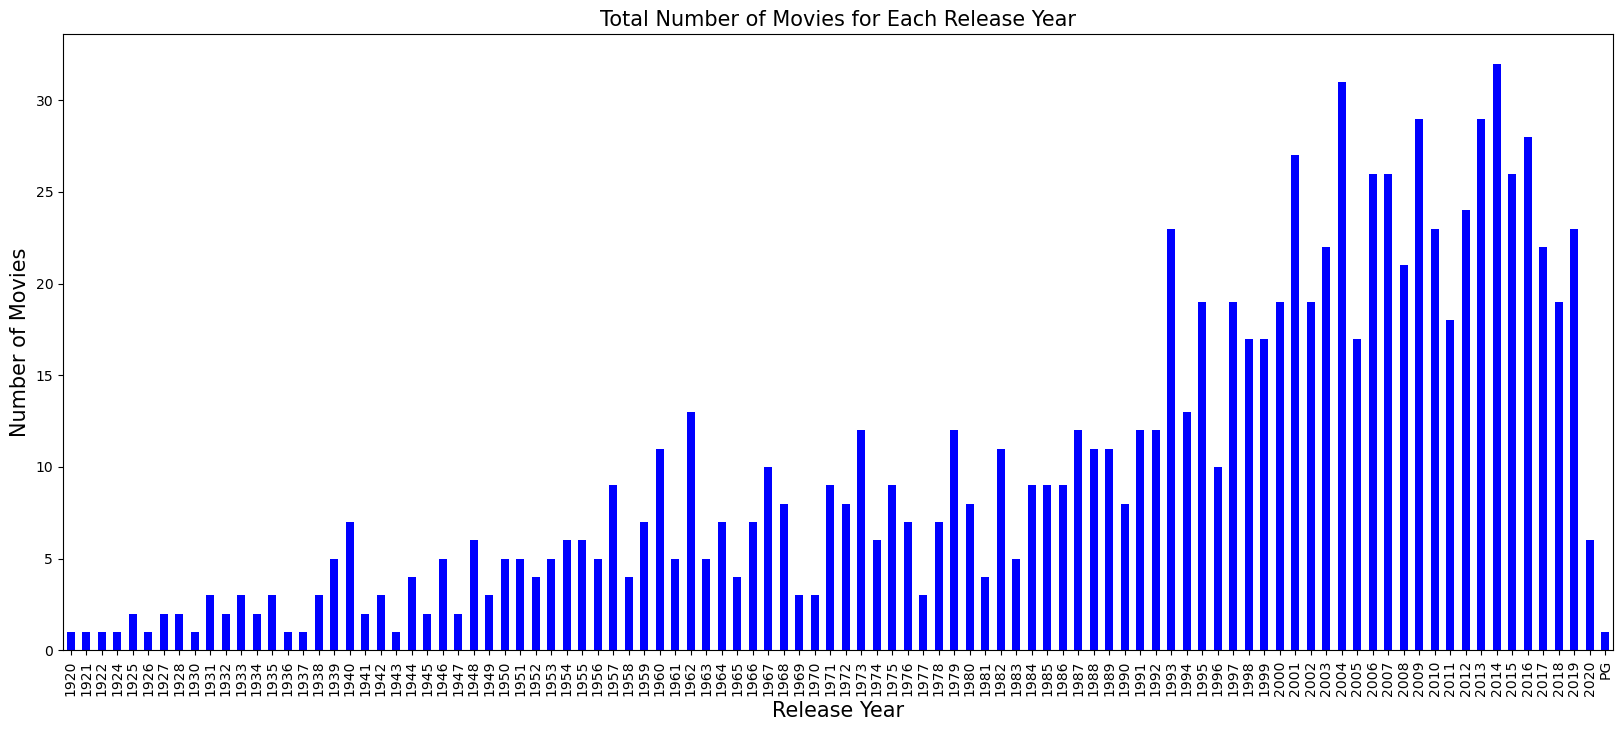

In [278]:
# Research Question 5: Number of movie releases per year
# Calculate movie counts for each release year
release_year_counts = merged_df['year'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(20, 8))  # Set figure size
release_year_counts.plot(kind='bar', color='blue')  # Bar plot

# Add labels and title
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Total Number of Movies for Each Release Year', fontsize=15)

# Display the plot
plt.show()



In [280]:
'''
From the above bar graph: year '2014' is the year of most movie release with '35' movie. 
release year of the movies starts from 1920 to 2020
'''

"\nFrom the above bar graph: year '2014' is the year of most movie release with '35' movie. \nrelease year of the movies starts from 1920 to 2020\n"

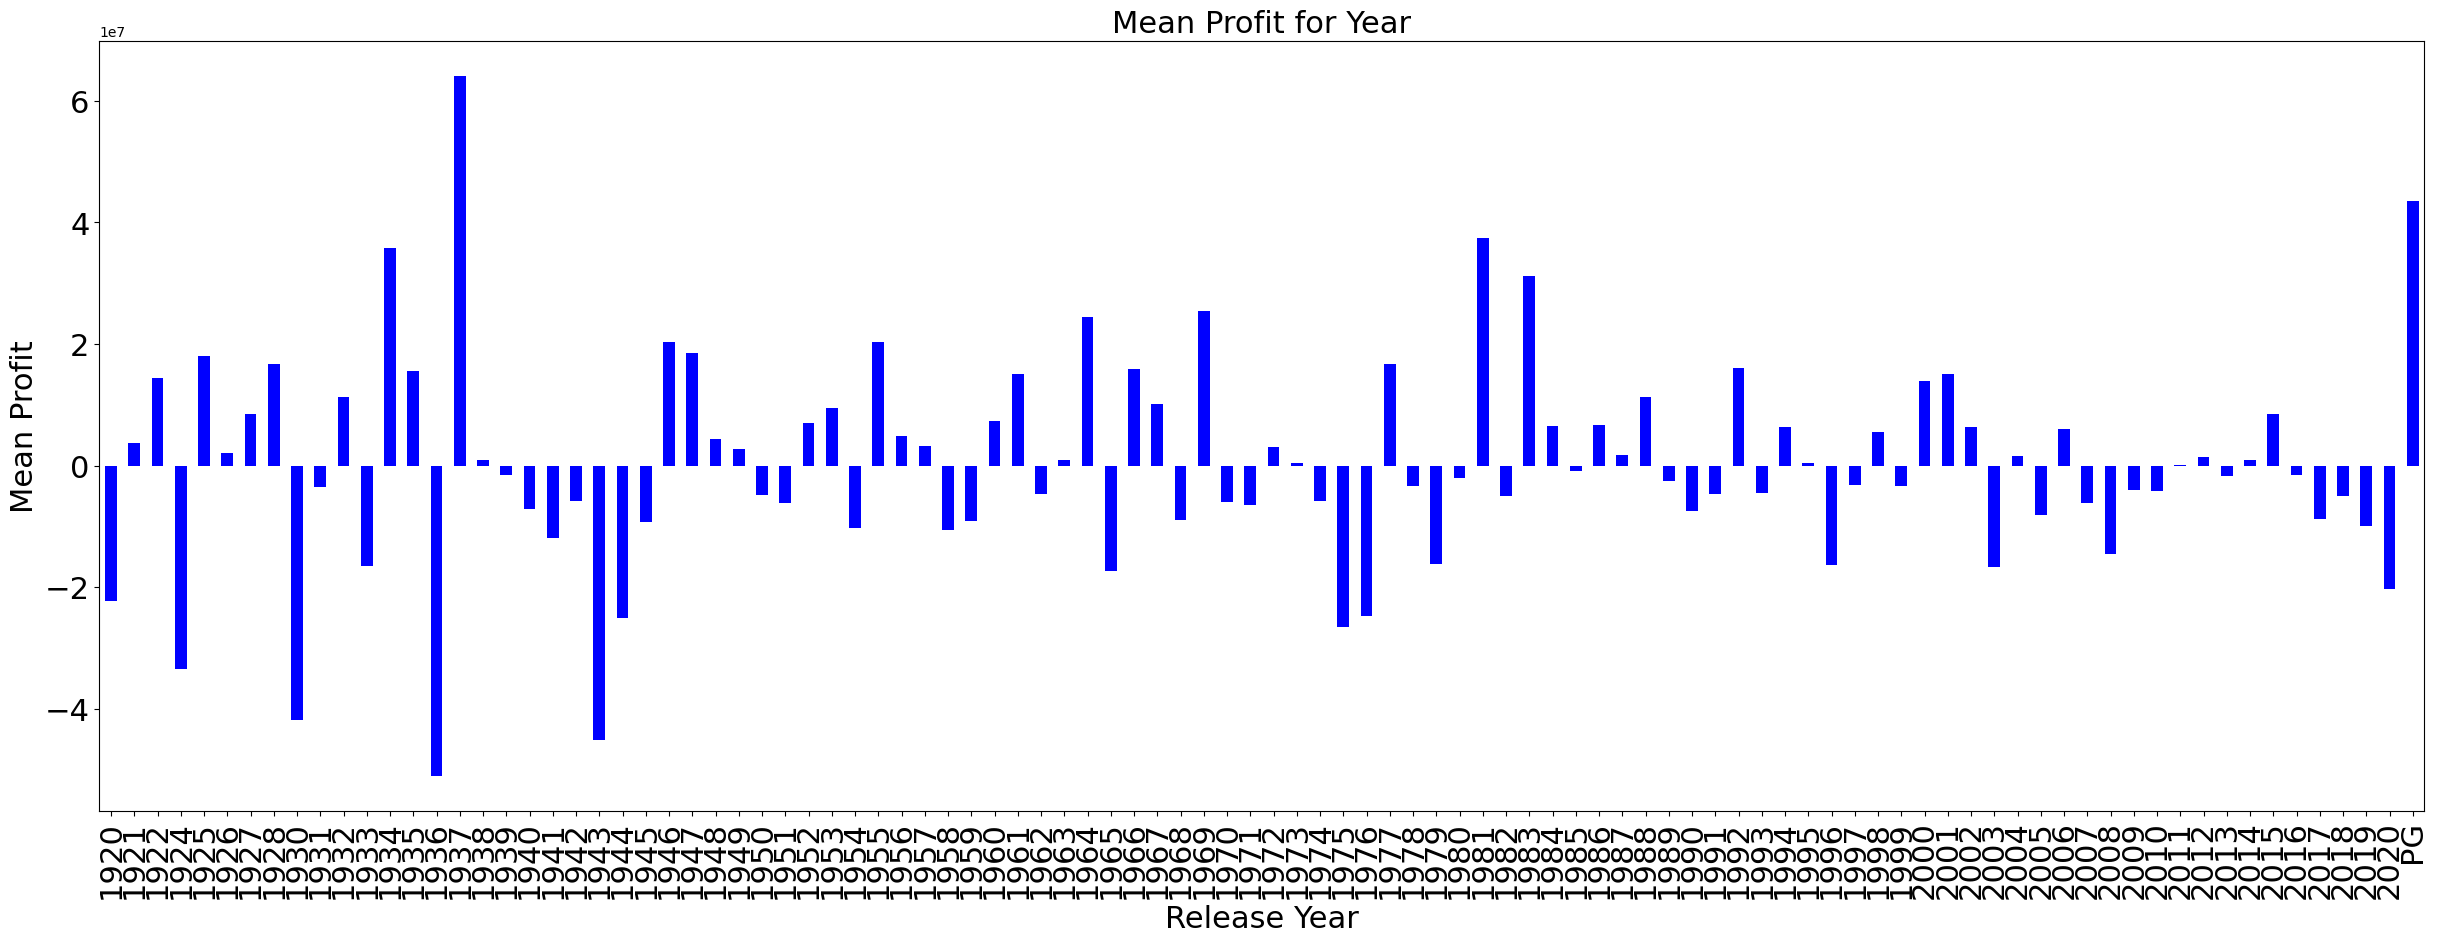

In [290]:
#  Research Question 5: Number of movie releases per year

def plot(graph, xvec, yvec, xlabel, ylabel, title, op):
    # Group by the specified vector and compute the desired operation
    if op == 0:  # compute sum
        gb = merged_df.groupby(xvec)[yvec].sum()
    elif op == 1:  # compute mean
        gb = merged_df.groupby(xvec)[yvec].mean()
    else:
        raise ValueError("Operation must be 0 (sum) or 1 (mean)")

    # Start plotting the graph
    ax = gb.sort_index().plot(kind=graph, figsize=(30, 10), color="blue", fontsize=22)

    # Set title and labels
    ax.set_title(title, fontsize=22)
    ax.set_xlabel(xlabel, fontsize=22)
    ax.set_ylabel(ylabel, fontsize=22)

    # Display the plot
    plt.show()

# Example usage
# Assuming df is your DataFrame and it has 'release_year' and 'profit' columns
plot('bar', 'year', 'Profit', 'Release Year', 'Mean Profit', 'Mean Profit for Year', 1)

In [292]:
'''
From the above bar graph: year '1937' has the largest mean profit with nearly '600 million dolar'. 
Mean profit ranges from -40 million dollar to 600 million dolar
'''

"\nFrom the above bar graph: year '1937' has the largest mean profit with nearly '6 million dolar'. \nMean profit ranges from -4 million dollar to 6 million dolar\n"

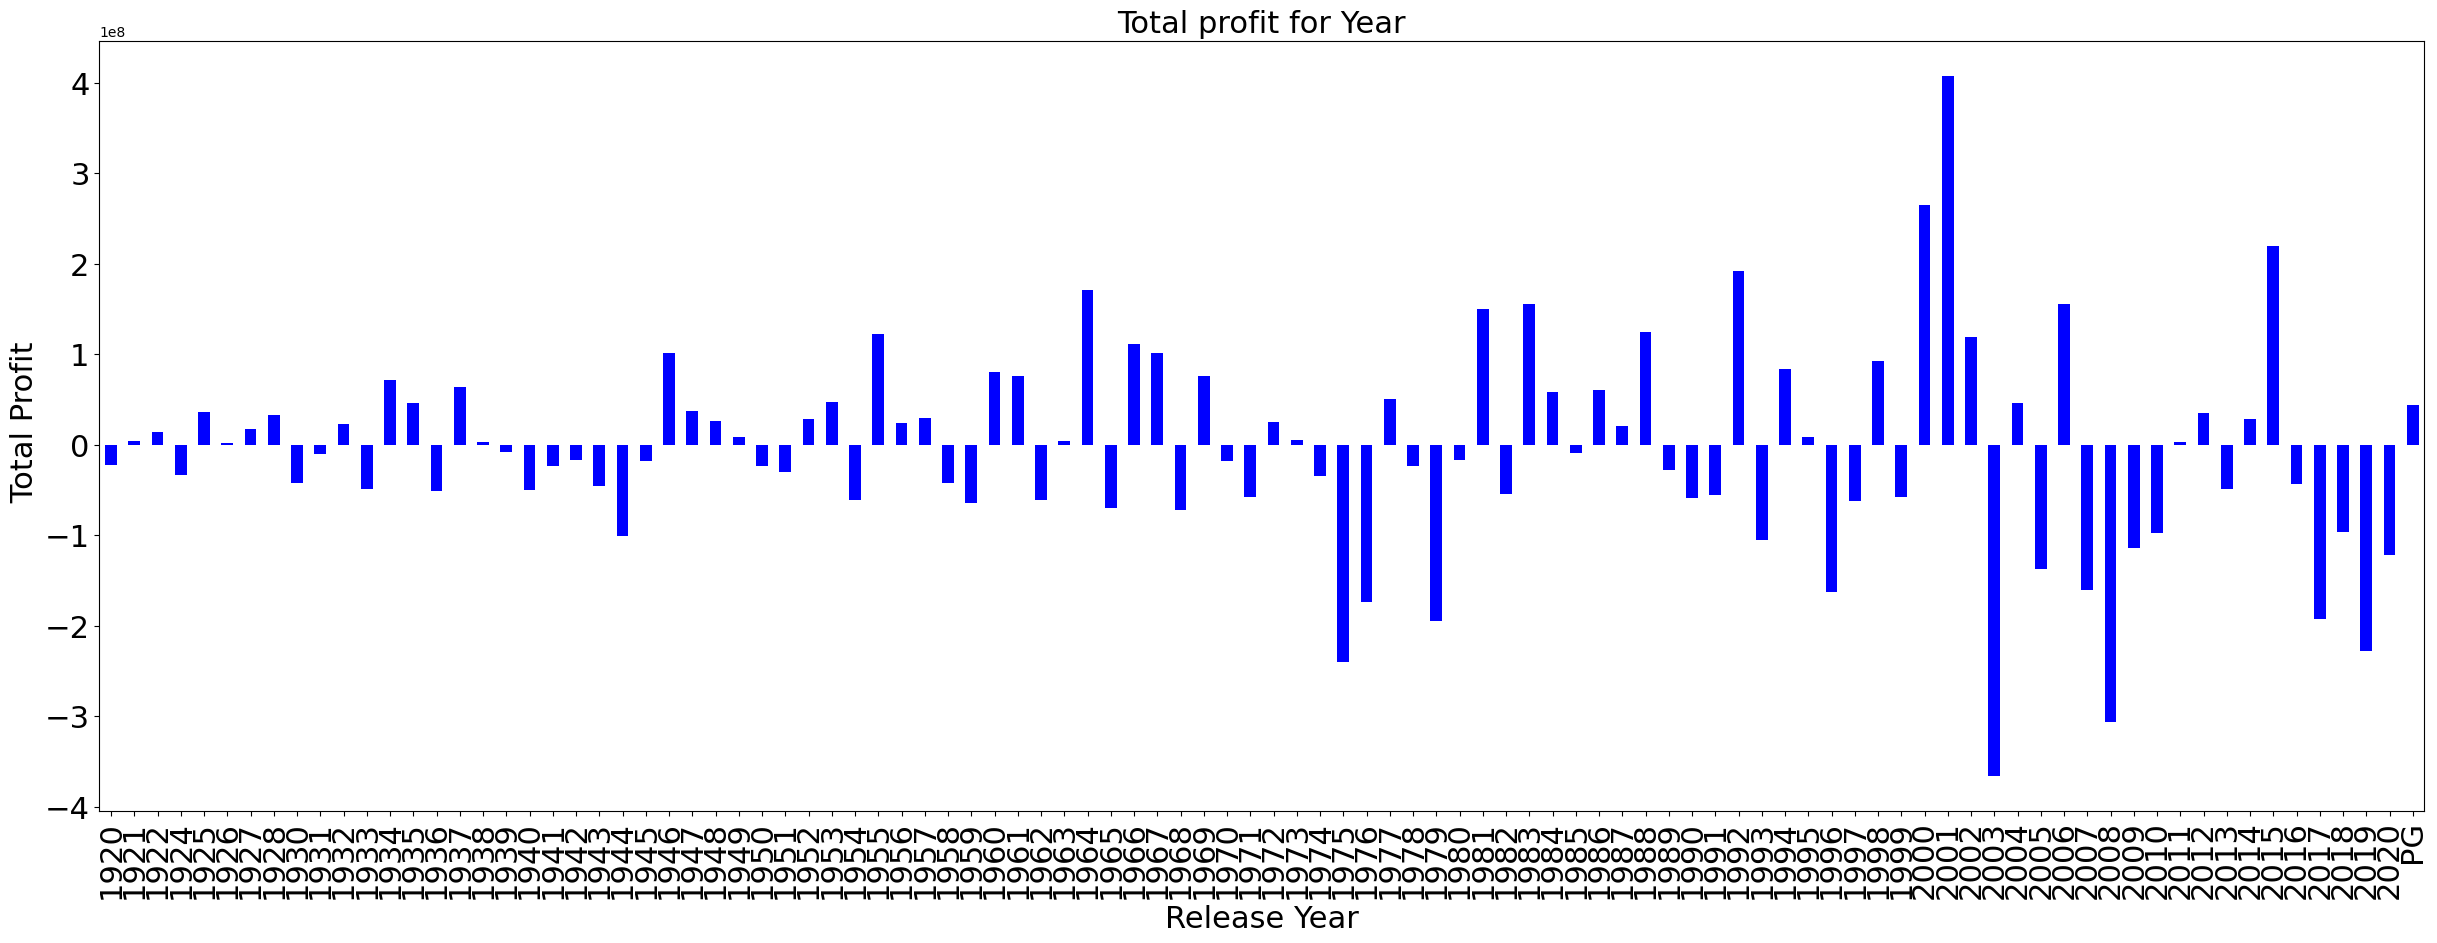

In [296]:
# Research Question 7:Total profit for each release year

#Display total profit grouped by release year 
plot('bar', 'year', 'Profit', 'Release Year',' Total Profit', 'Total profit for Year' , 0)

In [300]:
'''
From the above bar graph: 
- year '2001' has the maximum total profit (income from the movies) 
with nearly '400 billion dolar'.

-year '2003' has the minimum total profit (income from the movies) 
with nearly '-300 billion dolar'.
'''

"\nFrom the above bar graph: \n- year '2001' has the maximum total profit (income from the movies) \nwith nearly '400 billion dolar'.\n\n-year '2003' has the minimum total profit (income from the movies) \nwith nearly '-300 billion dolar'.\n"

<Axes: xlabel='Revenue', ylabel='Profit'>

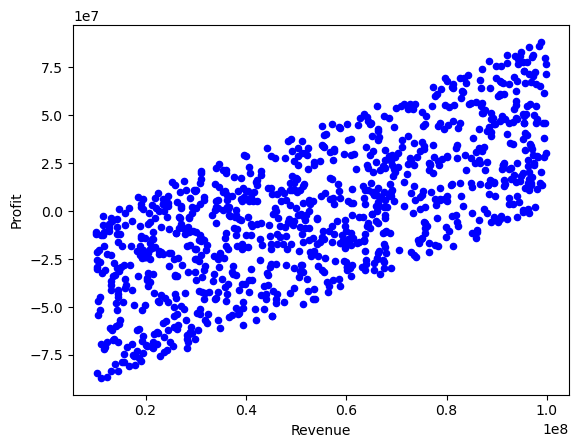

In [306]:
#  Research Question 8: Relationship between revenue and profit
merged_df.plot(
    x='Revenue', 
    y='Profit', 
    kind='scatter', 
    color='blue'
)


In [308]:
'''
From the above bar graph: there is a strong positive correlation between revenue and profit. if 
the revenue of a movie increases the profit increases.
'''

'\nFrom the above bar graph: there is a strong positive relationship between revenue and profit. if \nthe revenue of a movie increases the profit increases.\n'

# Calculate Correlation
correlation = merged_df['Revenue'].corr(merged_df['Profit'])

print("correlation :", correlation)

<Axes: xlabel='Runtime', ylabel='Rating'>

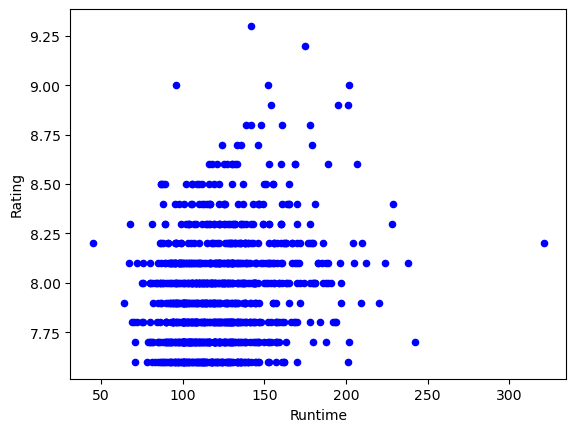

In [316]:
#  Research Question 9: Relationship between Runtime and vote_count
merged_df.plot(
    x='Runtime', 
    y='Rating', 
    kind='scatter', 
    color='blue'
)


In [318]:
# Calculate Correlation between Runtime and Rating
correlation = merged_df['Runtime'].corr(merged_df['Rating'])

print("correlation :", correlation)

correlation : 0.24531005306012657


In [320]:
'''
From the above bar graph: there is a weak positive correlation  between Runtime and Rating
'''

'\nFrom the above bar graph: there is a weak positive correlation  between Runtime and Rating\n'

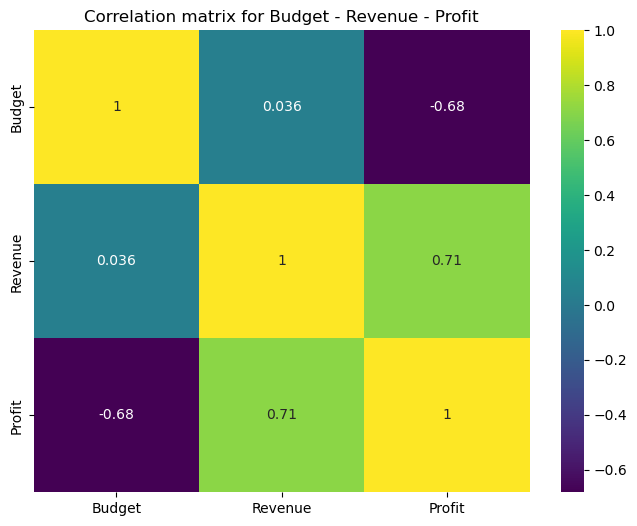

In [322]:
# Research Question 10: Correlation between budget, revenue, and profit
 # construct df_ from three columns of the DF (budget, revenue, and 
# Construct a new DataFrame with the selected columns
df = merged_df[['Budget', 'Revenue', 'Profit']]

# Compute the correlation matrix using Pearson correlation
corr_mat = df.corr(method='pearson')

# Draw the heatmap
plt.figure(figsize=(8, 6))  # Optional: Adjust the size of the plot
sn.heatmap(corr_mat, cmap='viridis', annot=True)

# Set the title for the heatmap
plt.title("Correlation matrix for Budget - Revenue - Profit")

# Show the plot
plt.show()

In [324]:
'''
From the above Heatmap: There is a positive correlation between three variables: budget, 
revenue, and profit. correlation is computed for each two variable: There is strong positive 
correlation between budget and revenue. besides there is a strong positive correlation between 
revenue and profit (0.71). in addition there is no linear relationship between budget and revenue.
'''

'\nFrom the above Heatmap: There is a positive correlation between three variables: budget, \nrevenue, and profit. correlation is computed for each two variable: There is strong positive \ncorrelation between budget and revenue. besides there is a strong positive correlation between \nrevenue and profit (0.71). in addition there is a positive correlation between budget and revenue.\n'

In [328]:
# Calculate Correlation between budget and revenue.
correlation = merged_df['Budget'].corr(merged_df['Revenue'])

print("correlation :", correlation)

correlation : 0.036406395073028244


In [334]:
'''
Conclusions
This dataset provides rich insights into the world of movies, 
but it also comes with some limitations. Issues like outliers, overlapping genres, 
and mixed data types were challenges that required careful processing during the data cleaning phase. Despite these hurdles, 
the analysis reveals several intriguing findings about movie trends, financial performance, and audience ratings.

After conducting the exploratory data analysis, we can conclude that:

1- Runtime: The shortest movie in the dataset has a runtime of 45 minutes, while the longest runs for 321 minutes, with an average runtime of 123 minutes.
2- Rating: Movie ratings range between 7.6 and 9.3, with an average rating of 7.95. The Shawshank Redemption is the highest-rated movie with a score of 9.3.
3- Budget and Revenue:
4- The highest budget is approximately $100 million (Joyeux Noël, 2005).
5- The highest revenue also touches $100 million, achieved by The Graduate (1967).
6- On average, movies in this dataset have a budget and revenue of $54 million.
7- Genres: Drama and Comedy are the most dominant genres, but the dataset represents 21 unique genres in total, showcasing the diversity of the movie industry.
8- Yearly Trends: The maximum number of movies were released in 2015, demonstrating a peak in movie production that year.
9- Correlations:
A positive correlation exists between runtime and rating, indicating that longer movies tend to receive slightly higher ratings.
Similarly, budget and revenue show a positive relationship, but higher budgets don’t always guarantee proportionate revenue increases.
'''

'\nConclusions\nThis dataset provides rich insights into the world of movies, \nbut it also comes with some limitations. Issues like outliers, overlapping genres, \nand mixed data types were challenges that required careful processing during the data cleaning phase. Despite these hurdles, \nthe analysis reveals several intriguing findings about movie trends, financial performance, and audience ratings.\n\nAfter conducting the exploratory data analysis, we can conclude that:\n\n1- Runtime: The shortest movie in the dataset has a runtime of 45 minutes, while the longest runs for 321 minutes, with an average runtime of 123 minutes.\n2- Rating: Movie ratings range between 7.6 and 9.3, with an average rating of 7.95. The Shawshank Redemption is the highest-rated movie with a score of 9.3.\n3- Budget and Revenue:\n4- The highest budget is approximately $100 million (Joyeux Noël, 2005).\n5- The highest revenue also touches $100 million, achieved by The Graduate (1967).\n6- On average, movies 

In [336]:
output_path = r'D:\Data Science\merged_movies.csv'
merged_data.to_csv(output_path, index=False)
print(f"File saved at: {output_path}")

File saved at: D:\Data Science\merged_movies.csv
